In [55]:
from sympy import symbols, init_printing, simplify
init_printing()

In [56]:
mX, ma, mb, M0, M1, M2 = symbols('m_X, m_a, m_b, M_0, M_1, M_2', positive=True)

# Passarino-Veltaman definitions

## A0

In [57]:
from PaVe2 import A0

In [58]:
A0(mX, M0).doit()

In [59]:
A0(125.3, 1000.0)

## B1_0

In [60]:
from PaVe2 import B1_0, b1_0

In [61]:
B1_0(ma, M0, M1).doit()

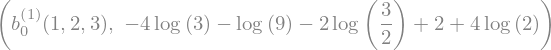

In [62]:
b1_0(1, 2, 3), b1_0(1, 2, 3).doit()

In [63]:
b1_0(1, 2, 3).evalf()

In [64]:
b1_0(1, 2, 3).doit()._eval_evalf(53)

In [65]:
B1_0(1, 2, 3)#.evalf()

In [66]:
B1_0(1, 2, 3).evalf()

In [67]:
B1_0(1, 2, 3).doit()._eval_evalf(53)

## B2_0

In [68]:
from PaVe2 import B2_0

In [69]:
B2_0(mb, M0, M2).doit()

In [70]:
B2_0(1.0, 2, 3)

In [71]:
B2_0(1.0, 2, 3).evalf()

## B1_1

In [72]:
from PaVe2 import B1_1

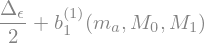

In [73]:
B1_1(ma, M0, M1).doit()

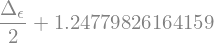

In [74]:
B1_1(1, 2, 3).evalf()

## B2_1, B12_0, B12_1, B12_2

In [75]:
from PaVe2 import B2_1, B12_0,  B12_1, B12_2

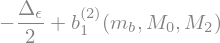

In [76]:
B2_1(mb, M0, M2).doit()

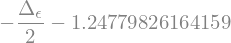

In [77]:
B2_1(1, 2, 3).evalf()

In [78]:
B12_0(mX, M1, M2).doit()


In [79]:
B12_0(1,2,3).evalf()

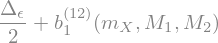

In [80]:
B12_1(mX, M1, M2).doit()

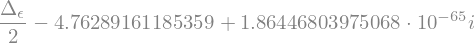

In [81]:
B12_1(1, 2, 3).evalf()

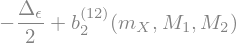

In [82]:
B12_2(mX, M1, M2).doit()

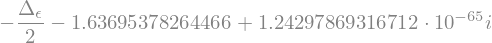

In [83]:
B12_2(1, 2, 3).evalf()

## C0

In [84]:
from PaVe2 import C0

In [85]:
C0(mX, ma, mb, M0, M1, M2).doit()

In [86]:
C0(125, 0, 0, 1,100, 100).evalf()

## C1, C2

In [87]:
from PaVe2 import C1, C2

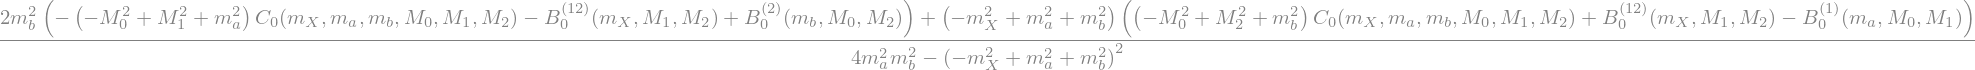

In [88]:
C1(mX, ma, mb, M0, M1, M2).doit()

In [89]:
C1(100, 2, 3, 4, 5, 6).doit().evalf()

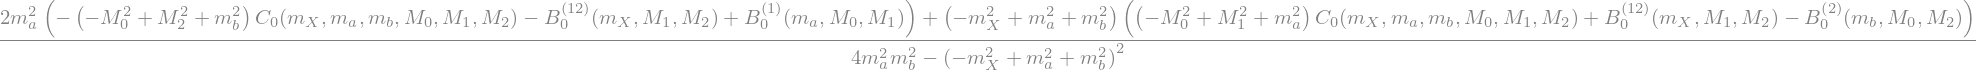

In [90]:
C2(mX, ma, mb, M0, M1, M2).doit()

In [91]:
C2(100, 3, 2, 4, 6, 5).doit().evalf()

## Cij

In [92]:
from PaVe2 import C00, C11, C12, C22, D

C00

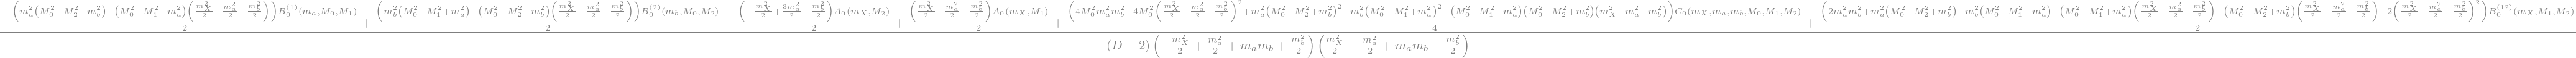

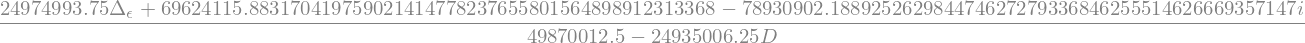

C11

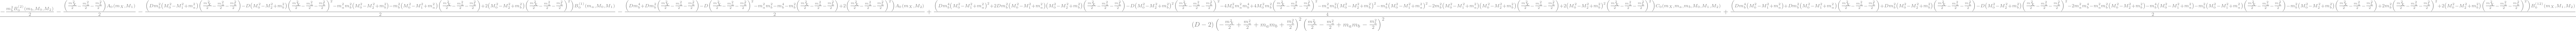

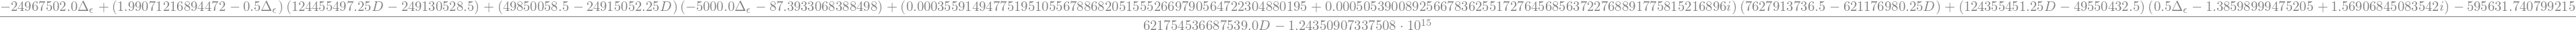

C12

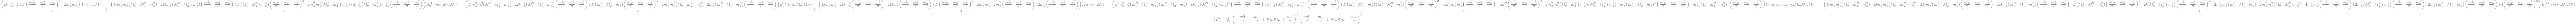

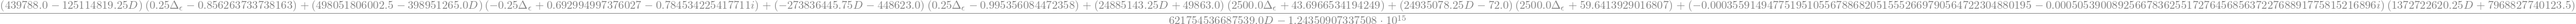

C22

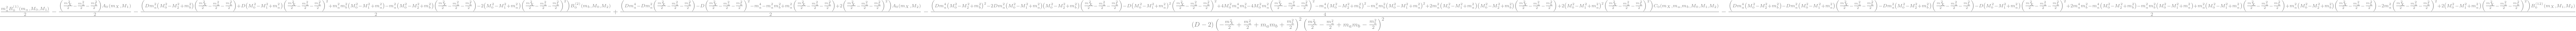

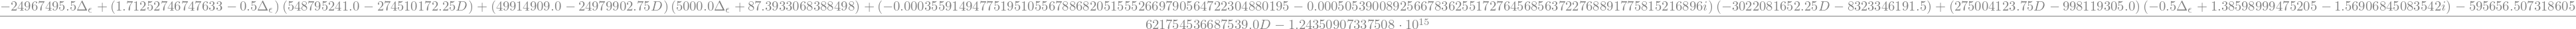

In [93]:
Cij = C00, C11, C12, C22
for cij in Cij:
    display(cij)
    try:
        display(cij(mX, ma, mb, M0, M1, M2).doit())
    except NotImplementedError as e:
        print(f"Error in {cij}: {e}")
    try:
        display(cij(100, 3, 2, 4, 6, 5).doit().evalf())
    except NotImplementedError as e:
        print(f"Error in {cij}: {e}")

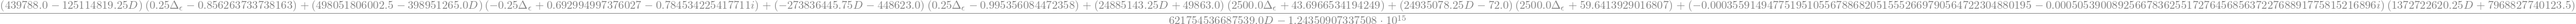

In [94]:
C12(100, 3, 2, 4, 6, 5).doit().evalf()

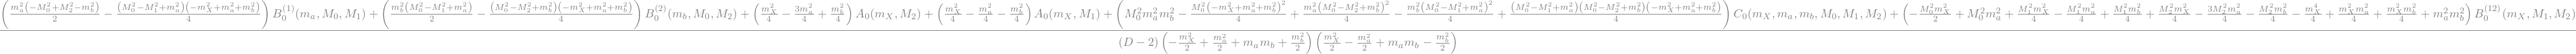

In [95]:
pave0 = [
    C0(mX, ma, mb, M0, M1, M2), B12_0(mX, M1, M2), B1_0(ma, M0, M1), 
    B2_0(mb, M0, M2), A0(mX, M0), A0(mX, M1), A0(mX, M2)
]
C00(mX, ma, mb, M0, M1, M2).doit().collect(pave0, simplify)

In [96]:
from sympy import lambdify, Function

In [97]:
import sys
sys.path.append('C:/Users/moise/OneDrive/Escritorio/LRSM-with-Spheno/UFOmodel/LFVXD')

In [98]:
from numeric.data import replaceBs, pave_functions

In [99]:
from mpmath import *
mp.dps = 15; mp.pretty = True

In [100]:
C00_def = C00(mX, ma, mb, M0, M1, M2).doit()

C00_mp = lambdify(
    [mX, ma, mb, M0, M1, M2],
    replaceBs(C00_def.subs(D,4)),
    modules=['mpmath', pave_functions()]
)

C00_mp(100, 3, 2, 4, 6, 5)

(-3.59049646258258 + 1.58273275325378j)

In [102]:
mp.chop(C00_mp(100, 3, 2, 4, 6, 5))

(-3.59049646258258 + 1.58273275325378j)

In [105]:
from PaVe2 import D, Δe 

In [109]:
B12_0_def = B12_0(mX, M1, M2)

B12_0_mp = lambdify(
    [mX, M1, M2],
    replaceBs(B12_0_def.subs(Δe,0)),
    modules=['mpmath', pave_functions()]
)

B12_0_mp(125, 5, 6)

(-7.62838828758847 + 3.14380433481792j)